In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Project Setup

In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.shape

(9134, 24)

## Basic Data Cleaning

- initial check for null values
- stadardize headers
- check for duplicated entries

In [4]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.isna().sum() # null values check

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
# standardize headers
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
# check for duplicated entries
df[df.duplicated()].shape[0] > 1

False

## Clean Numerical and Categorical Data

### Numerical Data

- check if types are all correct
- check if any feature should be converted into another base or rounded etc.
- check if any of the numercial values should be converted to categorical

In [10]:
df.select_dtypes('number')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
df['number_of_policies'].unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5])

In [12]:
df['number_of_open_complaints'].unique()

array([0, 2, 1, 3, 5, 4])

In [13]:
df['customer_lifetime_value'] = [ round(r, 2) for r in df['customer_lifetime_value']]
df['total_claim_amount'] = [ round(r, 2) for r in df['total_claim_amount']]

### Categorcial data

- check if vals in the categical features need formatting/cleaning
- check if any of the features should be converted to numerical
- deal with datetime strings

In [14]:
df.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [15]:
# drop customer column as this is some internal ID / reference
df.drop(['customer'], axis=1, inplace=True)

In [16]:
# check for unique values in the categoricals
print(df.select_dtypes('object').apply(lambda col: col.unique()))

state                [Washington, Arizona, Nevada, California, Oregon]
response                                                     [No, Yes]
coverage                                    [Basic, Extended, Premium]
education            [Bachelor, College, Master, High School or Bel...
effective_to_date    [2/24/11, 1/31/11, 2/19/11, 1/20/11, 2/3/11, 1...
employmentstatus     [Employed, Unemployed, Medical Leave, Disabled...
gender                                                          [F, M]
location_code                                 [Suburban, Rural, Urban]
marital_status                             [Married, Single, Divorced]
policy_type              [Corporate Auto, Personal Auto, Special Auto]
policy               [Corporate L3, Personal L3, Corporate L2, Pers...
renew_offer_type                      [Offer1, Offer3, Offer2, Offer4]
sales_channel                        [Agent, Call Center, Web, Branch]
vehicle_class        [Two-Door Car, Four-Door Car, SUV, Luxury SUV,...
vehicl

In [17]:
# deal with date string
# convert string to datetime obj
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

# check for unqiue vals for year, month, day
print('unique years: ', df['effective_to_date'].dt.year.unique())
print('unique months: ', df['effective_to_date'].dt.month.unique())
print('unique days: ', df['effective_to_date'].dt.day.unique())

unique years:  [2011]
unique months:  [2 1]
unique days:  [24 31 19 20  3 25 18 26 17 21  6 10  5 27 14 29 28 12  2  7 22 13 15  8
 11 23 16  9  4  1 30]


In [18]:
# based ont the overview above:
# years can be dropped since the info here is static
# month and day can be kept as two numerical columns (for now)

df['effective_to_month'] = df['effective_to_date'].dt.month
df['effective_to_day'] = df['effective_to_date'].dt.day

# the datetime obj column can be dropepd as info is now extracted
df.drop('effective_to_date', axis=1, inplace=True)

## Insights Numerical and Categorical Data

###  Numerical Data
- create correlation matrix / check correlation to target (if already known)
- check dstribution of data



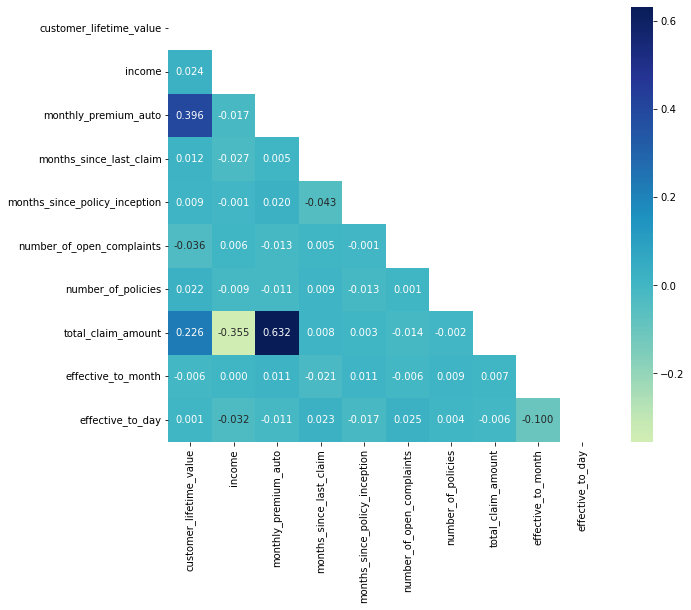

In [19]:
# correlation matrix for numerical cols
num_corr = df.select_dtypes('number').corr()
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(num_corr, center=0, fmt=".3f", square=True, annot=True, mask=mask, cmap="YlGnBu")
plt.show()

In [21]:
# Check for correlation between total claim amont and the numerical cols
df.select_dtypes('number').corr()['total_claim_amount'].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
effective_to_month               0.006820
months_since_policy_inception    0.003335
number_of_policies              -0.002354
effective_to_day                -0.005707
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

In [22]:
# helper func to get set of features above certain threshold
def correlation_check(df, threshold):
    corr_matrix = df.select_dtypes('number').corr()
    c_sorted = corr_matrix.unstack().sort_values()
    threshold_pairs = c_sorted[(abs(c_sorted) > threshold) & (abs(c_sorted) < 1)]
    
    return set(threshold_pairs.index.get_level_values(0))

In [23]:
strong_corr_features = correlation_check(df, 0.3)
strong_corr_features

{'customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount'}

#### we can see (varying levels) corretalation between:
     - total_claim_amount and customer_lifetime_value
     - total_claim_amount and income
     - total_claim_amount and monthly_premium_auto
     - customer_lifetime_value and monthly_premium_auto

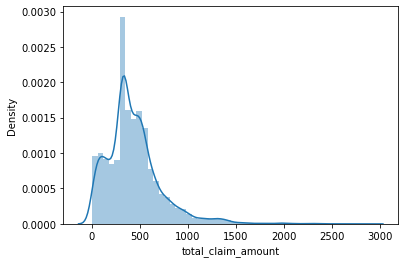

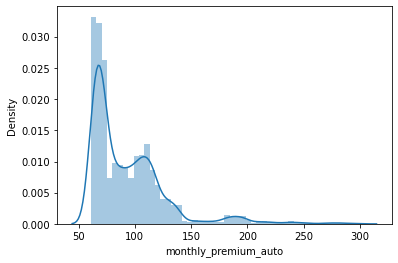

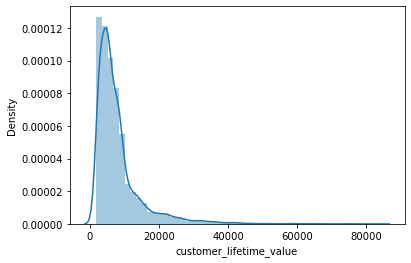

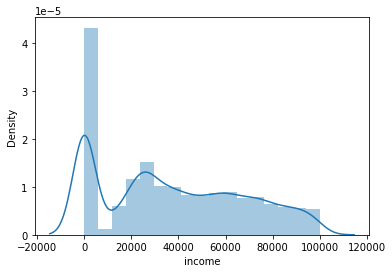

In [24]:
# plot features with abs corr > 0.3
for col in df[list(strong_corr_features)]:
    sns.distplot(df[col])
    plt.show()

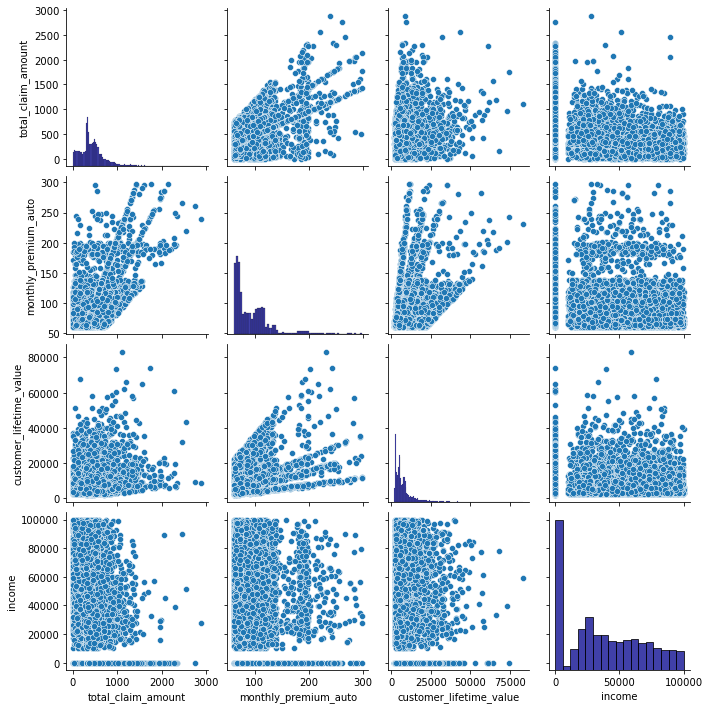

In [25]:
# pair plot features with abs corr > 0.3
sns.pairplot(df[list(strong_corr_features)], diag_kws={'color':'darkblue'})

- we see the linear relationships (to some extent)
- also, all four features have a skewed distribution

In [26]:
df_weak_corr = df.drop(list(strong_corr_features), axis=1)

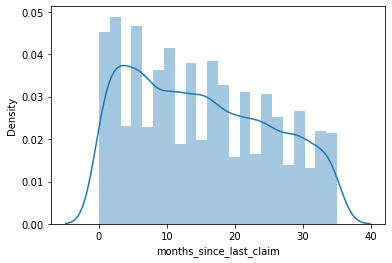

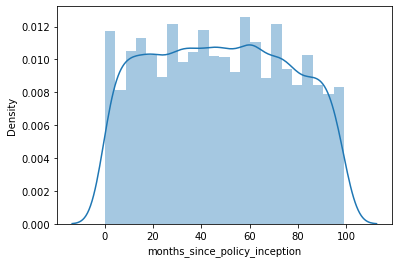

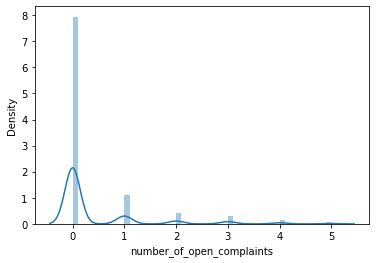

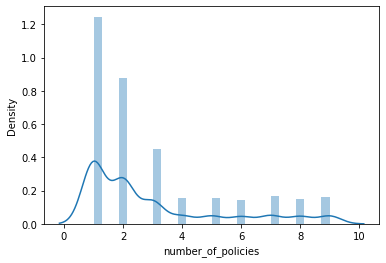

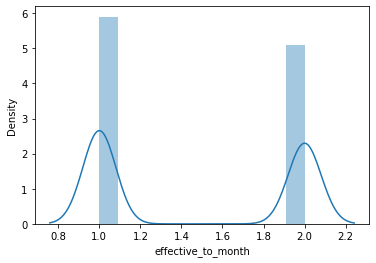

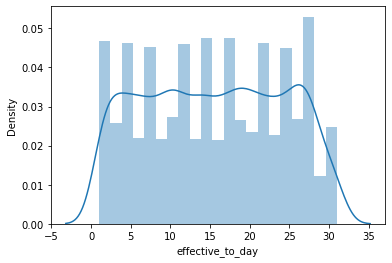

In [27]:
for col in df_weak_corr.select_dtypes('number'):
    sns.distplot(df[col])
    plt.show()

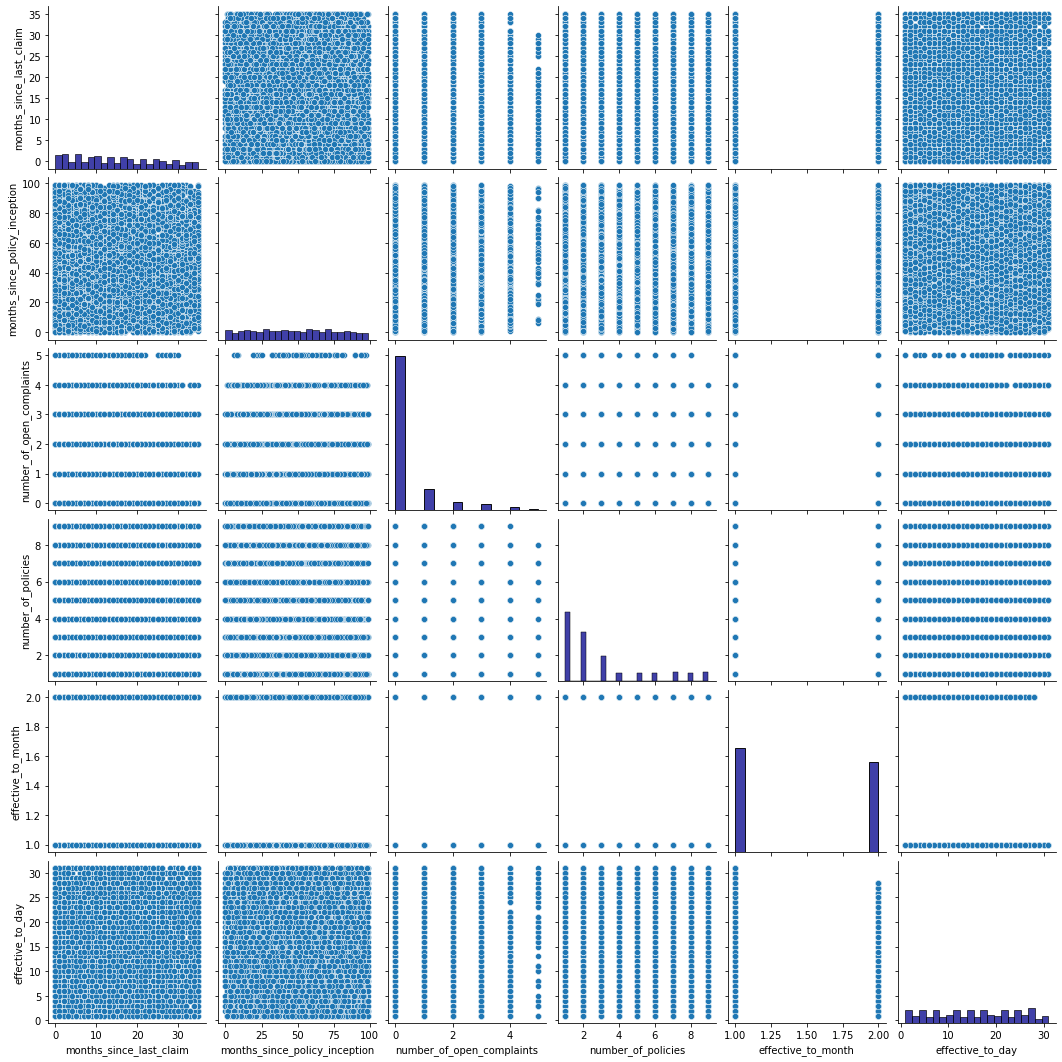

In [28]:
sns.pairplot(df_weak_corr.select_dtypes('number'), diag_kws={'color':'darkblue'})

- I would probably drop some of the numerical features down the line: like eg effective_to_month and effective_to_day
- Also, features number_of_policies and number_of_open_complaines are maybe better represented as categorical vals or dropped as well


###  Categorical Data
- plot data to explore some categorical features

<AxesSubplot:xlabel='coverage', ylabel='total_claim_amount'>

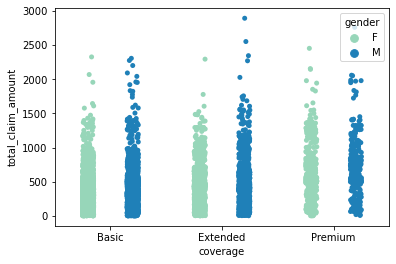

In [29]:
sns.stripplot(x="coverage", y="total_claim_amount", data=df, hue="gender", palette="YlGnBu", dodge=True)

<AxesSubplot:xlabel='state', ylabel='total_claim_amount'>

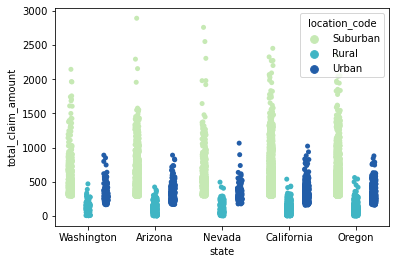

In [30]:
sns.stripplot(x="state", y="total_claim_amount", data=df, hue="location_code", palette="YlGnBu", dodge=True)

<AxesSubplot:xlabel='location_code', ylabel='total_claim_amount'>

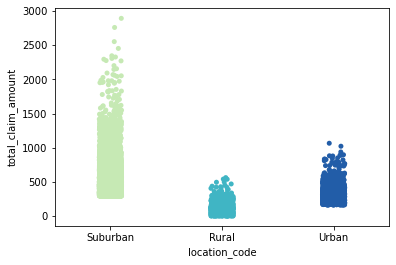

In [31]:
sns.stripplot(x="location_code", y="total_claim_amount", data=df, palette="YlGnBu", dodge=True)

In [84]:
# check data ratios for loaction code to undertand why there is the difference above between the three codes
suburban = df[df['location_code'] == 'Suburban'].shape[0]/df.shape[0]
rural = df[df['location_code'] == 'Rural'].shape[0]/df.shape[0]
urban = df[df['location_code'] == 'Urban'].shape[0]/df.shape[0]

print(f'Ratio suburban: {round(suburban, 2) * 100}%')
print(f'Ratio rural: {round(rural, 2) * 100}%')
print(f'Ratio urban {round(urban, 2) * 100}%')

Ratio suburban: 63.0%
Ratio rural: 19.0%
Ratio urban 17.0%


<AxesSubplot:xlabel='location_code', ylabel='count'>

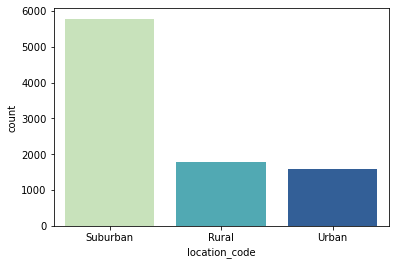

In [85]:
sns.countplot('location_code', data=df, palette='YlGnBu')

## Dealing with null values 

- no null values to be handles in this data set

## Checking for outliers

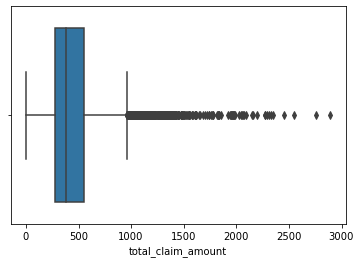

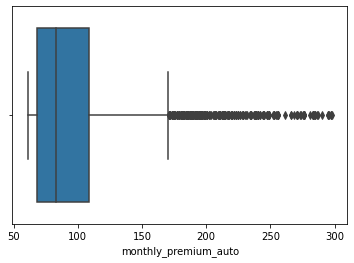

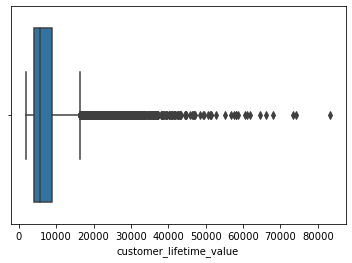

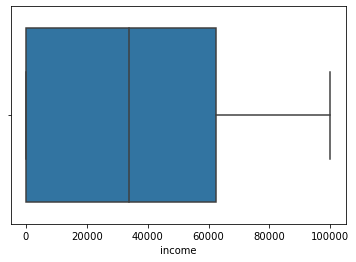

In [53]:
for col in df[strong_corr_features]:
    sns.boxplot(df[col])
     plt.show()

In [82]:
print(f'outliers total claim amount > 2300: {df[df["total_claim_amount"] > 2300].shape[0]}')
print(f'outliers customer lifetime value > 65.000: {df[df["customer_lifetime_value"] > 65_000].shape[0]}')

outliers total claim amount > 2300: 7
outliers customer lifetime value > 65.000: 5


- total_claim_amount and customer_lifetime_value might need adjustment on the outliers - we could also just drop the exteme ones since there are only a handfull of rows affected
- however, I would wait till after feature scaling to actually address this
- note that I only checked for outliers in the 'stronger' correlatd numerical features